<a href="https://colab.research.google.com/github/TDoi-99726/statistical_learning_with_python/blob/master/fixed_effect2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [ ]:
#df = pd.read_csv("billing_log.csv")
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/Shareddrives/課金調査/コード/固定効果/billing_log.csv')
df

Mounted at /content/drive


,Date,momokan13,dorahowl,budoubox,sitou33tM,elahrairah5,Miyako21,takataka20,jro33,Merry21,...,ゆきぞー,tonkkko6021,cw_satou,yusaku4665,NSNS1995,takidai99,mutkun0403,haikikun,Unnamed: 114,Unnamed: 115
0,2021/2/24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,2021/2/25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2021/2/26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,2021/2/27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,2021/2/28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2080,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2022/9/21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
575,2022/9/22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
576,2022/9/23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
577,2022/9/24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")

In [ ]:
df_w = df.resample("W").sum()
df_w.index

DatetimeIndex(['2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21',
               '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
               '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11',
               '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
               '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05',
               '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03',
               '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31',
               '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28',
               '2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26',
               '2022-01-02', '2022-01-09', '2022-01-16', '2022-01-23',
               '2022-01-30', '2022-02-06', '2022-02-13', '2022-02-20',
               '2022-02-27', '2022-03-06', '2022-03-13', '2022-03-20',
      

In [ ]:
#ダミー
df_w["ストーリー有無"]=[0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
               1, 1, 0, 0,
               1, 1, 0, 0,
               1, 1, 0, 0,
               1, 1, 0, 0,
               0, 1, 1, 0,
               0, 1, 1, 0,
               0, 0, 1, 1,
               0, 0, 1, 1,
               0, 0, 1, 1,
               0, 0, 0, 1,
               1, 0, 0]

In [ ]:
#リーグ
df_w["チャンピオンズ有無"]=[0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
                  0,0,0,0,
               0, 0, 1, 1,
               0, 0, 0, 1,
               1, 0, 0, 1,
               1, 0, 0, 1,
               1, 0, 0, 0,
               1, 1, 0, 0,
               1, 1, 0, 1,
               1, 0, 0, 0,
               1, 1, 0, 0,
               1, 1, 0, 0,
               0, 1, 0]

df_w["ストーリー有無"]=[0,0,0,0,
                  0,0,0,0,
                  0,0,1,0,
                  0,0,0,1,
                  0,0,0,0,
                  1,0,0,0,
                  0,1,0,0,
                  0,1,0,0,
                  0,1,0,0,
                  0,0,1,1,
                  1,0,0,1,
                  1,0,0,1,
                  1,0,0,1,
                  1,0,0,0,
                  1,1,0,0,
                  1,1,0,0,
                  0,1,1,0,
                  0,1,1,0,
                  0,1,1,0,
                  0,0,1,1,
                  0,0,0,0]

df_w["チャンピオンズ有無"]=[0,0,0,0,
                  0,0,0,0,
                  0,0,1,0,
                  0,0,0,1,
                  0,0,0,0,
                  1,0,0,0,
                  0,1,0,0,
                  0,1,0,0,
                  0,1,0,0,
                  0,0,1,0,
                  0,0,1,0,
                  0,1,0,0,
                  0,0,1,0,
                  0,0,1,0,
                  0,0,1,0,
                  0,0,0,1,
                  0,0,1,0,
                  0,0,0,1,
                  0,0,0,1,
                  0,0,0,0,
                  1,0,0,0]

In [ ]:
#直近300日以内にアカウント作成した人消去
df_w = df_w.drop(["suika2288","おふとん103","kinokado","YUYU0703","mi_remo","長谷部杏菜","Webs1nj1","CdyCottonwt","tonkkko6021"], axis=1)

In [ ]:
#直近300日間のデータ
df_w1 = df_w["2021-12-05":"2022-09-25"]

In [ ]:
df_w1.reset_index(inplace=True)
df_w1.head()

,Date,momokan13,dorahowl,budoubox,sitou33tM,elahrairah5,Miyako21,takataka20,jro33,Merry21,...,cw_satou,yusaku4665,NSNS1995,takidai99,mutkun0403,haikikun,Unnamed: 114,Unnamed: 115,ストーリー有無,チャンピオンズ有無
0,2021-12-05,0,0,0,0,980,0,0,0,0,...,0,0,0,15390,0,0,0.0,0.0,1,0
1,2021-12-12,0,0,0,0,0,0,0,0,0,...,0,0,0,5020,0,0,0.0,0.0,1,0
2,2021-12-19,0,0,0,0,0,0,0,120,0,...,0,0,0,0,0,0,0.0,0.0,0,1
3,2021-12-26,0,0,980,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,1
4,2022-01-02,0,0,0,0,0,0,0,0,10000,...,0,0,0,0,0,0,0.0,0.0,1,0


時系列をパネルデータに変換

In [ ]:
bill_ammount = []
date = []
names = []
story_flag = []
champion_flag = []

for col in df_w1.columns[1:105]:
    bill_ammount.extend(list(df_w1[col]))
    names.extend([col] * 43)

for i in range(len(df_w1.columns[1:105])):
    date.extend(df_w1["Date"])
    story_flag.extend(df_w1["ストーリー有無"])

for j in range(len(df_w1.columns[1:105])):
    champion_flag.extend(df_w1["チャンピオンズ有無"])

In [ ]:
output_df = pd.DataFrame()
output_df["Date"] = date
output_df["Kakingaku"] = bill_ammount
output_df["Name"] = names
output_df["Story_Dummy"] = story_flag
output_df["Champions_Dummy"] = champion_flag

In [ ]:
#output_df.to_csv("パネルデータtoR.csv",encoding='utf_8_sig')

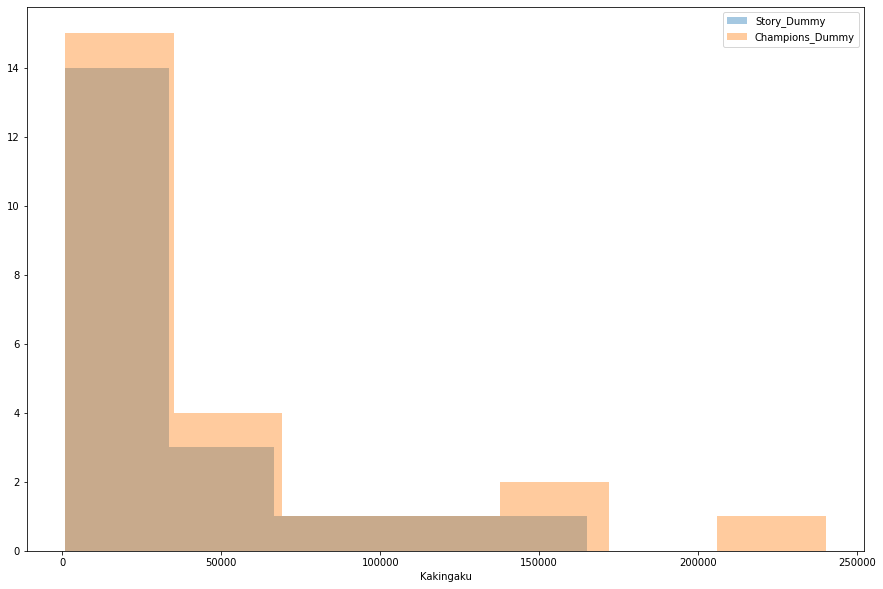

In [ ]:
#IDで集計
import matplotlib.pyplot as plt
df_story = output_df[output_df['Story_Dummy'] == 1]
df_groupby_story = df_story.groupby('Date').sum()

df_champ = output_df[output_df['Champions_Dummy'] == 0]
df_groupby_champ = df_champ.groupby('Date').sum()
plt.figure(figsize=(15, 10))

# df_groupby_story['key'] = 'Story_Dummy'
# df_groupby_champ['key'] = 'Champions_Dummy'
# df = pd.DataFrame({'Story_Dummy'  : df_groupby_story['Kakingaku'], 'Champions_Dummy' :  df_groupbyy_champ['Kakingaku']})
sns.distplot(df_groupby_story['Kakingaku'], kde=False, rug=False, label = 'Story_Dummy')
sns.distplot(df_groupby_champ['Kakingaku'], kde=False, rug=False, label = 'Champions_Dummy')
plt.legend()

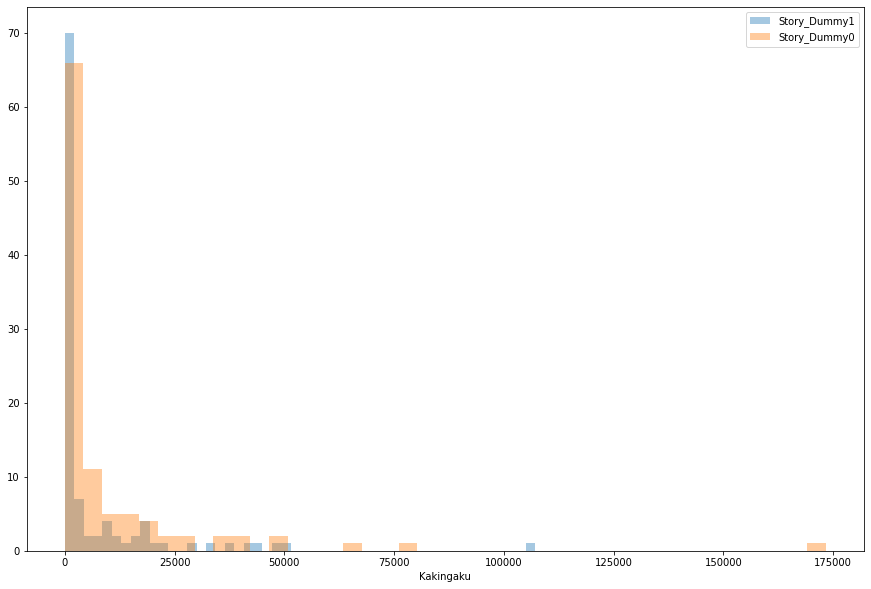

In [ ]:
#IDで集計
import matplotlib.pyplot as plt
df_story = output_df[output_df['Story_Dummy'] == 1]
df_groupby_story = df_story.groupby('Name').sum()

df_champ = output_df[output_df['Story_Dummy'] == 0]
df_groupby_champ = df_champ.groupby('Name').sum()
plt.figure(figsize=(15, 10))

# df_groupby_story['key'] = 'Story_Dummy'
# df_groupby_champ['key'] = 'Champions_Dummy'
# df = pd.DataFrame({'Story_Dummy'  : df_groupby_story['Kakingaku'], 'Champions_Dummy' :  df_groupbyy_champ['Kakingaku']})
sns.distplot(df_groupby_story['Kakingaku'], kde=False, rug=False, label = 'Story_Dummy1')
sns.distplot(df_groupby_champ ['Kakingaku'], kde=False, rug=False, label = 'Story_Dummy0')
plt.legend()

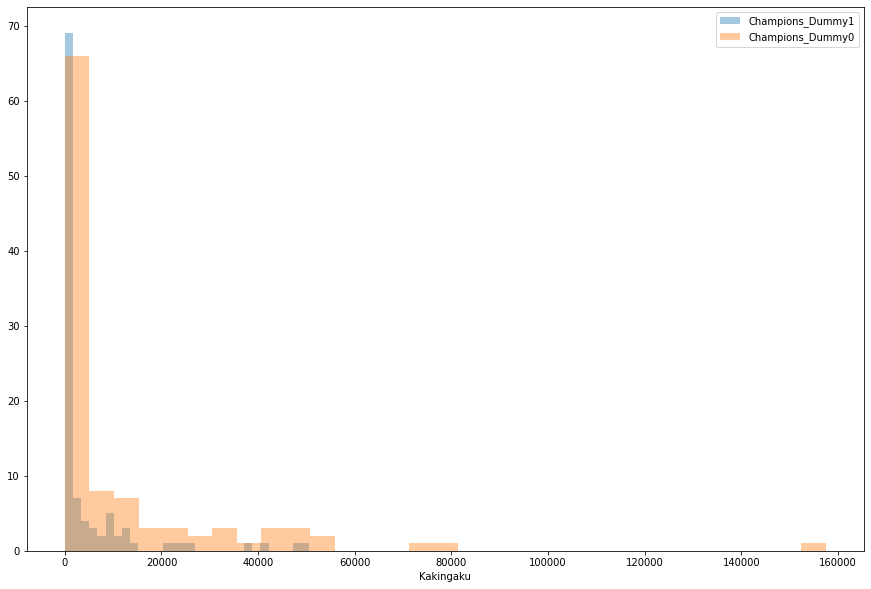

In [ ]:
#IDで集計
import matplotlib.pyplot as plt
df_story = output_df[output_df['Champions_Dummy'] == 1]
df_groupby_story = df_story.groupby('Name').sum()

df_champ = output_df[output_df['Champions_Dummy'] == 0]
df_groupby_champ = df_champ.groupby('Name').sum()
plt.figure(figsize=(15, 10))

# df_groupby_story['key'] = 'Story_Dummy'
# df_groupby_champ['key'] = 'Champions_Dummy'
# df = pd.DataFrame({'Story_Dummy'  : df_groupby_story['Kakingaku'], 'Champions_Dummy' :  df_groupbyy_champ['Kakingaku']})
sns.distplot(df_groupby_story['Kakingaku'], kde=False, rug=False, label = 'Champions_Dummy1')
sns.distplot(df_groupby_champ ['Kakingaku'], kde=False, rug=False, label = 'Champions_Dummy0')
plt.legend()

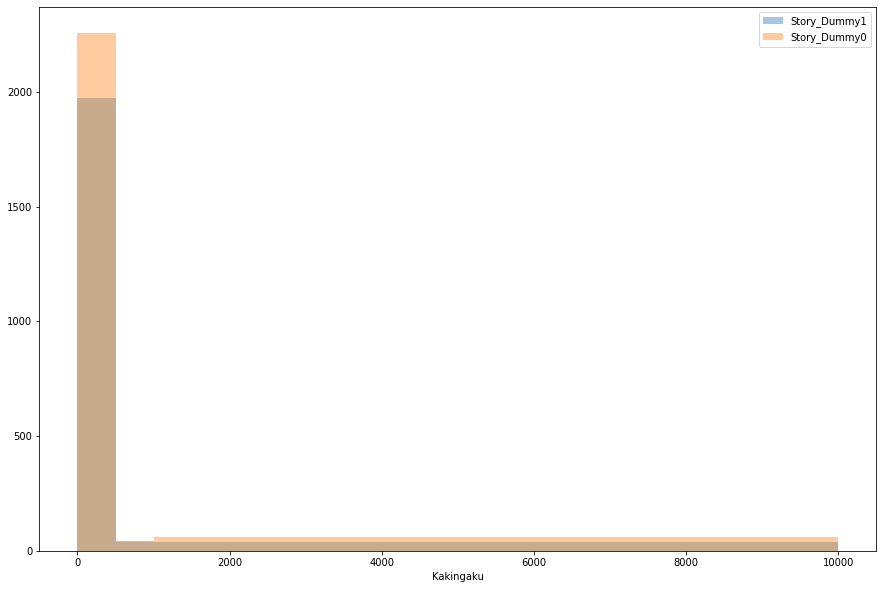

In [ ]:
#IDで集計
import matplotlib.pyplot as plt
df_story = output_df[output_df['Story_Dummy'] == 1]
q = df_story ['Kakingaku'].quantile(0.99)
df_story = df_story.query('Kakingaku < @q')

df_champ = output_df[output_df['Story_Dummy'] == 0]
q = df_champ['Kakingaku'].quantile(0.99)
df_champ = df_champ.query('Kakingaku < @q')
plt.figure(figsize=(15, 10))

# df_groupby_story['key'] = 'Story_Dummy'
# df_groupby_champ['key'] = 'Champions_Dummy'
# df = pd.DataFrame({'Story_Dummy'  : df_groupby_story['Kakingaku'], 'Champions_Dummy' :  df_groupbyy_champ['Kakingaku']})
sns.distplot(df_story['Kakingaku'], kde=False, rug=False, label = 'Story_Dummy1', bins = [0, 500, 1000, 10000])
sns.distplot(df_champ ['Kakingaku'], kde=False, rug=False, label = 'Story_Dummy0', bins = [0, 500, 1000, 10000])
plt.legend()

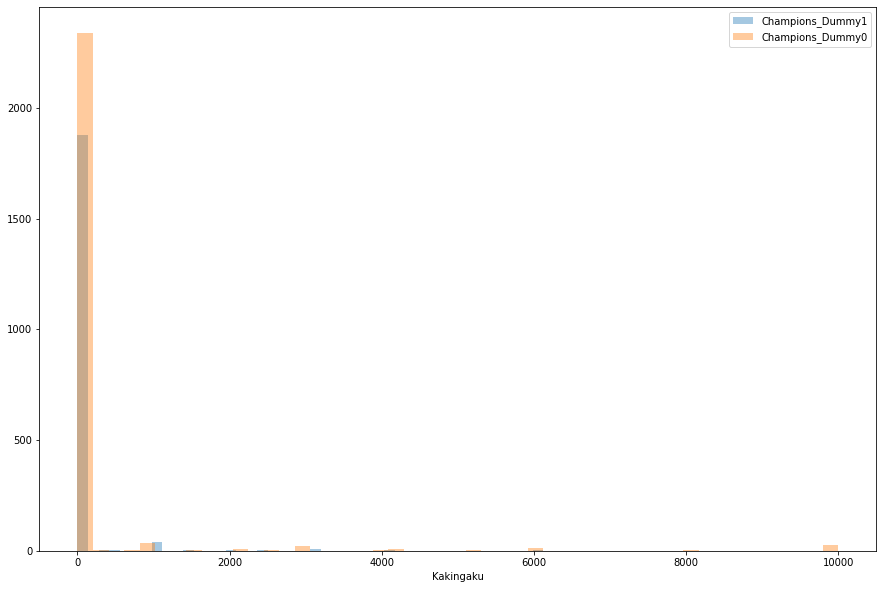

In [ ]:
#IDで集計
import matplotlib.pyplot as plt
df_story = output_df[output_df['Champions_Dummy'] == 1]
q = df_story ['Kakingaku'].quantile(0.99)
df_story = df_story.query('Kakingaku < @q')

df_champ = output_df[output_df['Champions_Dummy'] == 0]
q = df_champ['Kakingaku'].quantile(0.99)
df_champ = df_champ.query('Kakingaku < @q')
plt.figure(figsize=(15, 10))

# df_groupby_story['key'] = 'Story_Dummy'
# df_groupby_champ['key'] = 'Champions_Dummy'
# df = pd.DataFrame({'Story_Dummy'  : df_groupby_story['Kakingaku'], 'Champions_Dummy' :  df_groupbyy_champ['Kakingaku']})
sns.distplot(df_story['Kakingaku'], kde=False, rug=False, label = 'Champions_Dummy1')
sns.distplot(df_champ ['Kakingaku'], kde=False, rug=False, label = 'Champions_Dummy0')
plt.legend()

In [ ]:
output_df

,Date,Kakingaku,Name,Story_Dummy,Champions_Dummy
0,2021-12-05,0,momokan13,1,0
1,2021-12-12,0,momokan13,1,0
2,2021-12-19,0,momokan13,0,1
3,2021-12-26,0,momokan13,0,1
4,2022-01-02,0,momokan13,1,0
...,...,...,...,...,...
4467,2022-08-28,0,haikikun,0,0
4468,2022-09-04,0,haikikun,1,0
4469,2022-09-11,0,haikikun,1,0
4470,2022-09-18,0,haikikun,0,1


array(['momokan13', 'dorahowl', 'budoubox', 'sitou33tM', 'elahrairah5',
       'Miyako21', 'takataka20', 'jro33', 'Merry21', 'K.Unno',
       'neuconmsi', 'gonpati', '村紗 楓', 'bular', 'AYTK416', 'ryota3510',
       'popo02', 'yukimonma0111', 'Pero24', '麻生 まち.*･ﾟ', 'Nattoufu',
       '上野輪', 'nozaki@', 'www088759', 'tanaka_6231', 'pereo', 'meimei08',
       '217karin', 'Ichi355', 'takashimu666', 'yuki643499', '八坂＠', '猫柳はる',
       'aya6969', 'Sakuramine77', 'doctall12', 'K1515r', 'Tamura1212',
       'coffee.deeep', 'tn_english', 'twak529tmak', 'konin', '荒木11242',
       'surimi', 'Monti0918', 'chi.da.', 'nyannyan_k', 'suntake',
       'fox3939', 'senburiteana27', '左近\u3000剛', 'mokara',
       'naaaachandayooo', 'takabayashiriku', 'raven0078', 'httgs_dr',
       'Masaya_11', 'kotohiki', 'tensonsan', 'tskyio', 'Chirasama',
       'worksdellta2021', '金陵おいしいよ', 'masa124k', 'miyufrog',
       'huntinghunter716', 'tanakaleon', 'mihosan34', 'ok_2188',
       'morikoha0206', 'いこや', 'psrn', 'zark

In [ ]:
#output_df = output_df.set_index('Date')
name_list = output_df['Name'].unique()
for name in name_list:
  caldf = output_df[output_df['Name'] == name ]
  caldf['sabun']  = caldf.shift(periods=1,freq="W")['Kakingaku'] -  caldf['Kakingaku']

Date
2021-12-12    0
2021-12-19    0
2021-12-26    0
2022-01-02    0
2022-01-09    0
             ..
2022-09-04    0
2022-09-11    0
2022-09-18    0
2022-09-25    0
2022-10-02    0
Name: Kakingaku, Length: 4472, dtype: int64

In [ ]:
  caldf = output_df[output_df['Name'] == 'momokan13']
  caldf['sabun']  = caldf.shift(periods=1,freq="W")['Kakingaku'] -  caldf['Kakingaku']
  caldf['sabun']

<ipython-input-94-5ce1a310505c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caldf['sabun']  = caldf.shift(periods=1,freq="W")['Kakingaku'] -  caldf['Kakingaku']


Date
2021-12-05        NaN
2021-12-12        0.0
2021-12-19        0.0
2021-12-26        0.0
2022-01-02        0.0
2022-01-09        0.0
2022-01-16        0.0
2022-01-23   -10000.0
2022-01-30    10000.0
2022-02-06        0.0
2022-02-13        0.0
2022-02-20        0.0
2022-02-27        0.0
2022-03-06   -10000.0
2022-03-13    10000.0
2022-03-20        0.0
2022-03-27        0.0
2022-04-03        0.0
2022-04-10        0.0
2022-04-17        0.0
2022-04-24        0.0
2022-05-01        0.0
2022-05-08        0.0
2022-05-15        0.0
2022-05-22        0.0
2022-05-29        0.0
2022-06-05        0.0
2022-06-12        0.0
2022-06-19        0.0
2022-06-26        0.0
2022-07-03        0.0
2022-07-10        0.0
2022-07-17        0.0
2022-07-24        0.0
2022-07-31        0.0
2022-08-07        0.0
2022-08-14        0.0
2022-08-21        0.0
2022-08-28        0.0
2022-09-04   -31960.0
2022-09-11    31960.0
2022-09-18   -40610.0
2022-09-25    40610.0
Name: sabun, dtype: float64

In [ ]:
caldf['Kakingaku']

Date
2021-12-05        0
2021-12-12        0
2021-12-19        0
2021-12-26        0
2022-01-02        0
2022-01-09        0
2022-01-16        0
2022-01-23    10000
2022-01-30        0
2022-02-06        0
2022-02-13        0
2022-02-20        0
2022-02-27        0
2022-03-06    10000
2022-03-13        0
2022-03-20        0
2022-03-27        0
2022-04-03        0
2022-04-10        0
2022-04-17        0
2022-04-24        0
2022-05-01        0
2022-05-08        0
2022-05-15        0
2022-05-22        0
2022-05-29        0
2022-06-05        0
2022-06-12        0
2022-06-19        0
2022-06-26        0
2022-07-03        0
2022-07-10        0
2022-07-17        0
2022-07-24        0
2022-07-31        0
2022-08-07        0
2022-08-14        0
2022-08-21        0
2022-08-28        0
2022-09-04    31960
2022-09-11        0
2022-09-18    40610
2022-09-25        0
Name: Kakingaku, dtype: int64

普通の重回帰↓

In [ ]:
from pathlib import Path
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import math

In [ ]:
model_result = ols(data=output_df, formula="Kakingaku ~ +1 + Story_Dummy + Champions_Dummy").fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Kakingaku   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.370
Date:                Thu, 08 Dec 2022   Prob (F-statistic):            0.00469
Time:                        16:58:21   Log-Likelihood:                -42403.
No. Observations:                4472   AIC:                         8.481e+04
Df Residuals:                    4469   BIC:                         8.483e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         625.8823     95.480      6.555      0.000     438.694     813.070
Story_Dummy      -233.1383    106.867     -2.182      0.029    -442.650     -23.626
Champions_Dummy  -340.1861    107.335     -3.169      0.002    -550.615    -129.757
==============================================================================
Omnibus:                    11003.244   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        181808431.173
Skew:                          25.789   Prob(JB):                         0.00
Kurtosis:                     989.436   Cond. No.                         3.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""